# Libs

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Introducción y selección de variable

## Introducción al problema

El cambio climático es uno de los mayores retos globales de este siglo. Numerosos estudios han documentado que la **temperatura media global** ha aumentado de manera sostenida durante las últimas décadas, generando consecuencias como el **aumento del nivel del mar**, la **pérdida de cobertura glaciar** y una **mayor frecuencia de fenómenos meteorológicos extremos**. Comprender cómo evoluciona la temperatura global y cuáles son los factores que influyen en ella resulta clave para anticipar riesgos y diseñar políticas ambientales eficaces.

El dataset *climate_change.csv* contiene registros mensuales desde **1983 hasta 2008** y busca analizar la relación entre la temperatura global y diversos factores atmosféricos y solares. Las variables incluidas son:

- **Year**: año de la observación.
- **Month**: mes de la observación.
- **Temp**: diferencia en grados Celsius entre la temperatura media global del periodo y un valor de referencia histórico.
- **CO2**: concentración de dióxido de carbono (en ppmv).
- **CH4**: concentración de metano (en ppmv).
- **N2O**: concentración de óxido nitroso (en ppmv).
- **CFC-11 y CFC-12**: concentraciones de clorofluorocarbonos (en ppbv).
- **TSI**: irradiancia solar total (W/m²).
- **Aerosols**: profundidad óptica media de aerosoles estratosféricos, asociada a erupciones volcánicas.
- **MEI**: índice multivariado ENSO (El Niño/Oscilación del Sur), indicador de fenómenos oceánicos que impactan el clima global.

## Variable seleccionada: Temp

Para este análisis se selecciona la variable **Temp**, que es importante ya que mide el cambio en la temperatura global respecto a un promedio de referencia. Esta variable es fundamental porque:

- Refleja directamente el **efecto del cambio climático** a lo largo del tiempo.
- Permite detectar **tendencias de calentamiento global**.
- Constituye la base para analizar el impacto de otras variables explicativas, como los gases de efecto invernadero, la irradiación solar o la actividad volcánica.

Esta variable puede influir en la toma de decisiones al ser capaces de analizar la tendencia en el tiempo y que acciones se pueden tomar para corregirla. Para un próximo análisis bivariado podemos ver también que otras variables influyen y como manejar mejor este problema.


In [ ]:
df = pd.read_csv('../data/climate_change.csv')
df

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


In [4]:
df.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


Se observa que la media de la variable *Temp* es positiva, lo que indica que, en promedio, la temperatura global durante el periodo analizado fue **superior al valor de referencia histórico**. En otras palabras, existe un incremento sostenido de la temperatura respecto al promedio base, lo que refleja una clara tendencia de calentamiento global.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    int64  
 1   Month     308 non-null    int64  
 2   MEI       308 non-null    float64
 3   CO2       308 non-null    float64
 4   CH4       308 non-null    float64
 5   N2O       308 non-null    float64
 6   CFC-11    308 non-null    float64
 7   CFC-12    308 non-null    float64
 8   TSI       308 non-null    float64
 9   Aerosols  308 non-null    float64
 10  Temp      308 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 26.6 KB


Vemos que no hay nulos en los datos.

# Análisis univariado de la variable *Temp*

A continuación se realiza el análisis univariado de la variable **Temp**, que representa la diferencia en grados Celsius entre la temperatura global promedio y un valor de referencia histórico.


## Estadísticas descriptivas

In [13]:
# Selección de la variable Temp
temp = df["Temp"].dropna()
# Estadísticas descriptivas
print("Media:", temp.mean())
print("Mediana:", temp.median())
print("Moda:", temp.mode()[0])
print("Desviación estándar:", temp.std())
print("\nResumen completo:\n", temp.describe())

# Identificación de outliers con IQR
Q1 = temp.quantile(0.25)
Q3 = temp.quantile(0.75)
IQR = Q3 - Q1
outliers = temp[(temp < Q1 - 1.5*IQR) | (temp > Q3 + 1.5*IQR)]
print("Cantidad de outliers detectados:", outliers.count())

Media: 0.25677597402597396
Mediana: 0.248
Moda: 0.266
Desviación estándar: 0.1790897682410269

Resumen completo:
 count    308.000000
mean       0.256776
std        0.179090
min       -0.282000
25%        0.121750
50%        0.248000
75%        0.407250
max        0.739000
Name: Temp, dtype: float64
Cantidad de outliers detectados: 0


## Visualización de la distribución

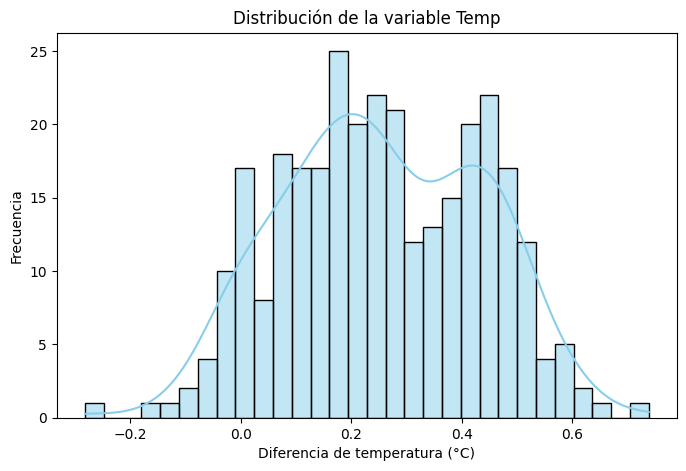

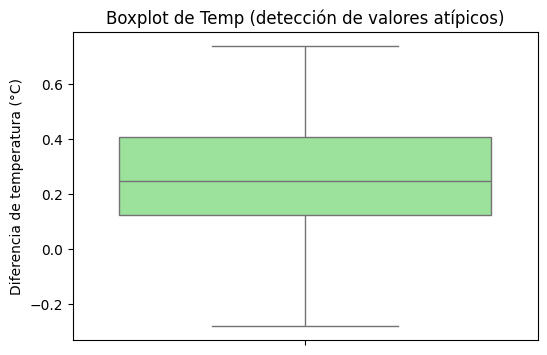

In [11]:
# Histograma con KDE
plt.figure(figsize=(8,5))
sns.histplot(temp, kde=True, bins=30, color="skyblue")
plt.title("Distribución de la variable Temp")
plt.xlabel("Diferencia de temperatura (°C)")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot para visualizar outliers
plt.figure(figsize=(6,4))
sns.boxplot(y=temp, color="lightgreen")
plt.title("Boxplot de Temp (detección de valores atípicos)")
plt.ylabel("Diferencia de temperatura (°C)")
plt.show()


## Interpretación de resultados

Los resultados estadísticos muestran que la **media** de la variable *Temp* es **0.257 °C**, mientras que la **mediana** es **0.248 °C** y la **moda** es **0.266 °C**. La **desviación estándar** es relativamente baja (**0.179 °C**) ,en especial comparado con los extremos, lo que indica que la mayoría de los valores se concentran cerca del promedio.  

El histograma revela que la distribución de *Temp* se concentra entre **0.2 °C y ~0.4 °C**, con una ligera asimetría hacia la derecha, lo que refleja un **sesgo positivo**: existen más observaciones con valores por encima de la media que por debajo.  Esto también puede dar pistas del constante y creciente aumento de la temperatura a lo largo de los años.

El boxplot confirma que **no se detectaron valores atípicos** mediante el criterio de rango intercuartílico (IQR). Esto significa que los cambios en la temperatura se comportan de manera relativamente estable dentro del rango observado, sin anomalías extremas.  

En conjunto, este análisis sugiere que durante el período **1983–2008** la temperatura global presentó una **diferencia positiva sostenida respecto al valor de referencia histórico**, lo que constituye una clara señal de **calentamiento global progresivo**.


# Conclusiones

El análisis univariado realizado sobre la variable *Temp* permite confirmar que, en el periodo comprendido entre **1983 y 2008**, la temperatura global presentó un **incremento sostenido respecto al valor de referencia histórico**. La media positiva, junto con la ausencia de valores atípicos significativos y la ligera asimetría hacia la derecha, refuerzan la evidencia de un **proceso de calentamiento progresivo**.

No obstante, este tipo de análisis tiene limitaciones. Si bien es fundamental como primer paso para comprender el comportamiento general de la variable, por sí solo **no es suficiente para identificar tendencias temporales ni para explicar la influencia de factores externos**. Para un estudio más profundo es necesario **contrastar la temperatura con otras variables** del conjunto de datos, como el año, las concentraciones de gases de efecto invernadero (CO₂, CH₄, N₂O) o el índice ENSO (MEI), lo que permitiría explorar **relaciones causales y patrones multivariados**.

En síntesis, el análisis univariado ofrece una visión clara de la distribución de la temperatura global y confirma su incremento en el periodo observado, pero debe complementarse con análisis multivariados para obtener conclusiones más robustas sobre las **causas y dinámicas del cambio climático**.
